# Business Analysis
### by Julien Dhouti
In this analysis, we used the Yelp Business dataset to answer some basic hypothesis questions.

The hypothesis question addressed in this notebook: Where should a business owner open his restaurant next?
To answer this question, we used a combination of the average star reviews in certain states, the kinds of cuisines missing in certain states and the amount of reviews per state.

In [172]:
# We begin by importing these necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [9]:
# The data we will be using in this notebook can be found 
df = pd.read_json('business.json', lines=True)

In [11]:
# Visualize the columns of the data
df.columns.values

array(['address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'], dtype=object)

In [14]:
# View the type of each column and more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.3+ MB


In [53]:
# Count the number of unique cities involved and display top 5
df['city'].value_counts(dropna=False).head()

Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

We notice from this that the city with the most reviews in the dataset is Las Vegas.

In [87]:
# Find the average star rating in each city
average_cities = df.groupby('city').mean().reset_index()
average_cities_sorted = average_cities[['city','stars']].sort_values('stars')
average_cities_sorted.head()

,city,stars
428,Las Vegas Nevada,1.0
417,Lake Norman,1.0
118,Canonsburd,1.0
859,"Scarborough,",1.0
987,Totronto,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1189c1320>]], dtype=object)

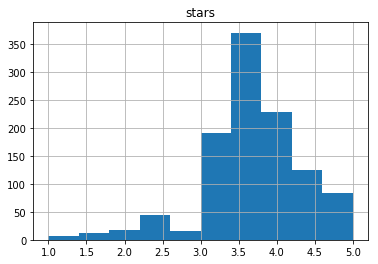

In [104]:
# A histogram describing the frequency of a certain star rating average
average_cities_sorted.hist('stars')

In [130]:
# Now let's find the average star rating by state. This could give the business owner an idea of which state is 
# lacking and gives a window of opportunity
average_state = df.groupby('state').count().reset_index()
average_state.head()

,state,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars
0,,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,01,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,30,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [131]:
# From the above, we can see that the by state data is very messy. We need to get rid of the data from unknown states
# We can do this by creating a list of a states, and then deleting any row that doesn't have one of those states
# in that row

states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cleaned_states = df[df.state.isin(states_list)]
cleaned_states.state.head()

0    AZ
1    PA
2    AZ
3    AZ
4    OH
Name: state, dtype: object

In [218]:
# Much better, now let's try the count again
state_reviews = cleaned_states.groupby('state').sum().sort_values('review_count')[['review_count']]
state_reviews.reset_index().state

0     MN
1     VA
2     GA
3     KY
4     NE
5     WA
6     DE
7     CO
8     VT
9     AL
10    MT
11    AK
12    IN
13    AR
14    CA
15    NY
16    FL
17    SC
18    IL
19    WI
20    PA
21    OH
22    NC
23    AZ
24    NV
Name: state, dtype: object

## Now we organize all of the ratings per state
We will create a dictionary with keys for each state, and the values for every state key will be another dictionary with rating values ranging from 1.0 to 5.0 increasing by 0.5, as the keys. This will count the amount of reviews for that rating per state.

We do this so that we can create a heatmap.

In [229]:
ratings = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
states_ratings_count = {}

for state in state_reviews.reset_index().state:
    states_ratings_count[state] = {}
    for rating in ratings:
        try:
            states_ratings_count[state][str(rating)] = df.groupby(['state', 'stars']).get_group((state, rating)).review_count.sum()
        except:
            states_ratings_count[state][str(rating)] = 0

In [264]:
states_ratings_count

{'MN': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 3,
  '4': 0,
  '4.5': 0,
  '5': 0},
 'VA': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 3,
  '4.5': 0,
  '5': 0},
 'GA': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 0,
  '4.5': 0,
  '5': 3},
 'KY': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 0,
  '4.5': 3,
  '5': 0},
 'NE': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 4,
  '4.5': 0,
  '5': 0},
 'WA': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 4,
  '4.5': 0,
  '5': 0},
 'DE': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 0,
  '4': 5,
  '4.5': 0,
  '5': 0},
 'CO': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 3,
  '3.5': 0,
  '4': 0,
  '4.5': 3,
  '5': 0},
 'VT': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3': 0,
  '3.5': 3,
  '4': 0,
  '4.5': 0,
  '5': 5},
 'AL': {'1': 0,
  '1.5': 0,
  '2': 0,
  '2.5': 0,
  '3'

In [230]:
# Now that we have the dictionary, we can create a dataframe for this collection
df1 = pd.DataFrame.from_dict(states_ratings_count)
# which we can then export as a csv file
df1.to_csv('ratings_per_state.csv')

## Obtain more insight about the data before we create the heatmap
To do this, we will create a histogram of all of the ratings and see which rating is the most common. This will help us create better ranges for our heatmap.

In [234]:
total_ratings = {}
for rating in ratings:
    total_ratings[str(rating)] = 0
    for state in states_ratings_count:
        total_ratings[str(rating)] += states_ratings_count[state][str(rating)]

In [235]:
total_ratings

{'1': 18425,
 '1.5': 51782,
 '2': 110415,
 '2.5': 261319,
 '3': 513952,
 '3.5': 951186,
 '4': 1392793,
 '4.5': 796070,
 '5': 294880}

Now that we have collected the data, we can graph the histogram very easily.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1199e88d0>]], dtype=object)

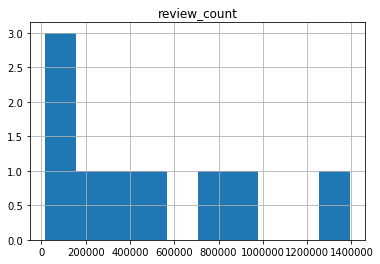

In [328]:
# first we convert the dictionary to a dataframe
df2 = pd.DataFrame.from_dict(total_ratings, orient='index')
df2 = df2.reset_index()
df2.columns = ['rating', 'review_count']

# plot the graph
df2.hist(bins=10)

Now that we are done preparing the data for the heatmap, we are able to create the following:

![](heatmap_demo.png)

# Find the top categories for 5 star businesses in every state

In [321]:
# restaurantsBusinessDF = businessDF[businessDF.apply(lambda row: "Restaurants" in row['categories'],axis=1)]
# any(business in row['categories'] for business in interestedIn)
interestedIn = ["Restaurants", 'Food', 'Pubs', 'Bars']
restaurantsBusinessDF = df[df.apply(lambda row: any(business in row['categories'] for business in interestedIn),axis=1)]

### Now that we have restricted all of the businesses to just restaurants, food, pubs, and bars, we can start determining which specialties are the most popular.

In [323]:
categories_count = {}
for state in state_reviews.reset_index().state:
    categories_count[state] = {}
    try:
        simplified_df = restaurantsBusinessDF.groupby(['state','stars']).get_group((state, 5))[['state','categories', 'stars']]
        for category_list in simplified_df['categories']:
            for category in category_list:
                if category in categories_count[state].keys():
                    categories_count[state][category] += 1
                else:
                    categories_count[state][category] = 1
    except:
        pass

Here we determined that we only wanted to examine the top 15 specialties. We threw the rest away :(

In [333]:
top_15 = {}
for state in categories_count.keys():
    sorted_dict = sorted(categories_count[state].items(), key=lambda x:x[1])[-16:-1]
    top_15[state] = sorted_dict

Here is a brief overview of all of the top 15 specialties in each state

In [353]:
top_15

{'MN': [],
 'VA': [],
 'GA': [],
 'KY': [],
 'NE': [],
 'WA': [],
 'DE': [],
 'CO': [],
 'VT': [],
 'AL': [],
 'MT': [],
 'AK': [],
 'IN': [],
 'AR': [],
 'CA': [],
 'NY': [('Sandwiches', 1),
  ('American (Traditional)', 1),
  ('Breakfast & Brunch', 1),
  ('Restaurants', 1)],
 'FL': [],
 'SC': [('Seafood', 1),
  ('Wedding Planning', 1),
  ('Bookstores', 1),
  ('Books', 1),
  ('Mags', 1),
  ('Music & Video', 1),
  ('Food Trucks', 2),
  ('Cupcakes', 2),
  ('Shopping', 2),
  ('Event Planning & Services', 2),
  ('Shaved Ice', 3),
  ('Bakeries', 3),
  ('Specialty Food', 4),
  ('Coffee & Tea', 5),
  ('Restaurants', 6)],
 'IL': [('Convenience Stores', 2),
  ('Beer', 3),
  ('Wine & Spirits', 3),
  ('Event Planning & Services', 3),
  ('Flowers & Gifts', 3),
  ('Shopping', 3),
  ('Chocolatiers & Shops', 3),
  ('Mexican', 4),
  ('Bars', 5),
  ('Bakeries', 5),
  ('Ice Cream & Frozen Yogurt', 5),
  ('Nightlife', 6),
  ('Coffee & Tea', 6),
  ('Specialty Food', 11),
  ('Restaurants', 18)],
 'WI': [('

### Now we can create bar graphs to visualize which specialties are the most popular among business owners, in each state

<Container object of 15 artists>

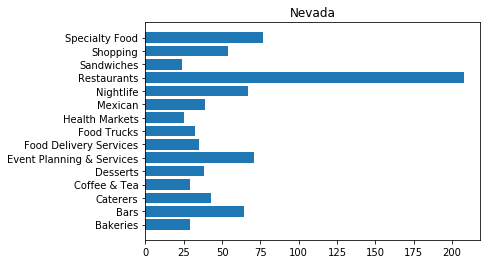

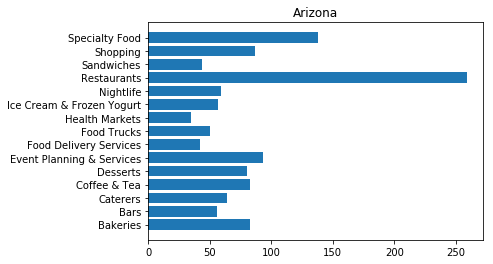

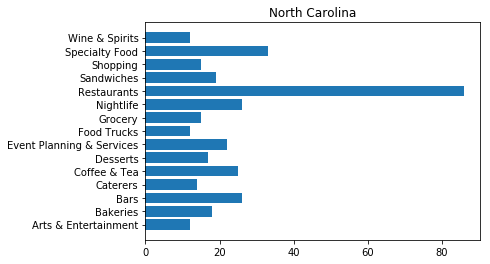

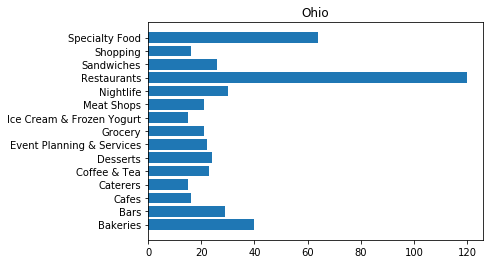

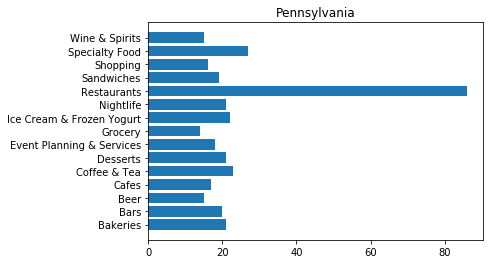

In [354]:
import matplotlib.pyplot as plt

nevada = dict(top_15['NV'])
arizona = dict(top_15['AZ'])
north_carolina = dict(top_15['NC'])
ohio = dict(top_15['OH'])
pennsylvania = dict(top_15['PA'])

plt.figure(1)
plt.title('Nevada')
plt.barh(list(nevada.keys()), list(nevada.values()))

plt.figure(2)
plt.title('Arizona')
plt.barh(list(arizona.keys()), list(arizona.values()))

plt.figure(3)
plt.title('North Carolina')
plt.barh(list(north_carolina.keys()), list(north_carolina.values()))

plt.figure(4)
plt.title('Ohio')
plt.barh(list(ohio.keys()), list(ohio.values()))

plt.figure(5)
plt.title('Pennsylvania')
plt.barh(list(pennsylvania.keys()), list(pennsylvania.values()))